In [1]:
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline 

In [2]:
Data_train=pd.read_csv('./titanic/train.csv')

In [3]:
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 填補Age的缺失值

In [6]:
Data_train.corrwith(Data_train['Age'])

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
dtype: float64

In [7]:
Data_train.groupby('Pclass')['Age'].median()
Data_train['Age']=Data_train.groupby(['Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [8]:
Data_train.dropna(subset=['Embarked'],inplace=True)

In [9]:
Data_train['Cabin'].fillna('X',inplace=True)

# 處理Feature

In [10]:
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S


In [11]:
Data_train['Title']=Data_train['Name'].apply(lambda x: x.split()[1][:-1])

In [12]:
Title_Dictionary = {
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
}

In [13]:
def alterTitle(x):
    if x in Title_Dictionary:
        return Title_Dictionary[x]
    else:
        return 'Others'

In [14]:
Data_train['Title']=Data_train['Title'].apply(alterTitle)

In [15]:
Data_train.groupby("Title")['PassengerId'].count().sort_values()

Title
Master     40
Others     45
Mrs       122
Miss      180
Mr        502
Name: PassengerId, dtype: int64

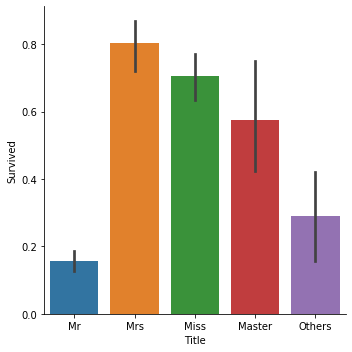

In [16]:
sns.catplot(x='Title',y='Survived',kind='bar',data=Data_train) 

In [17]:
Data_train['Age']=pd.cut(Data_train['Age'], [0, 15, 65, 120],labels=["child", "midlife", "older"])

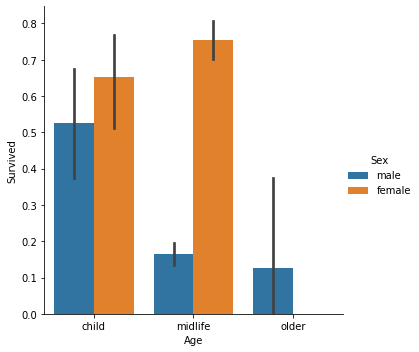

In [18]:
sns.catplot(x='Age',y='Survived',hue='Sex',kind='bar',data=Data_train) 

In [19]:
Data_train['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 889, dtype: int64

In [20]:
Data_train['FamilyNum']=Data_train['SibSp']+Data_train['Parch']+1

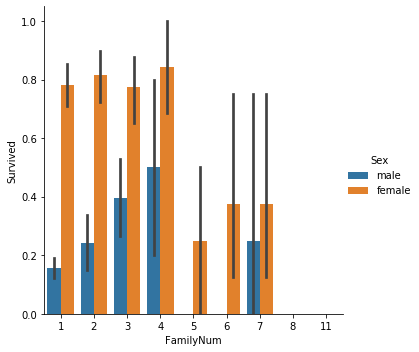

In [21]:
sns.catplot(x='FamilyNum',y='Survived',hue='Sex',kind='bar',data=Data_train) 

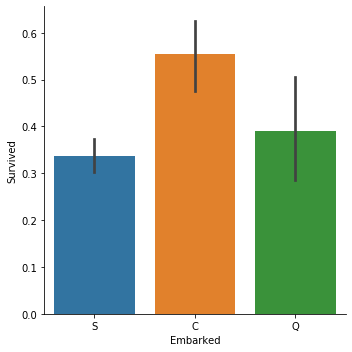

In [22]:
sns.catplot(x='Embarked',y='Survived',kind='bar',data=Data_train) 

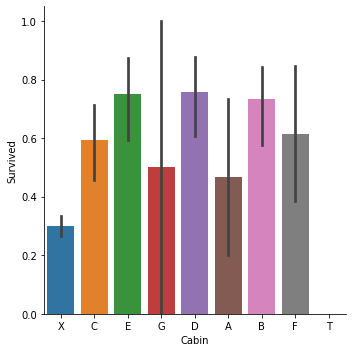

In [23]:
Data_train['Cabin']=Data_train['Cabin'].apply(lambda x:  x[0])
sns.catplot(x='Cabin',y='Survived',kind='bar',data=Data_train) 

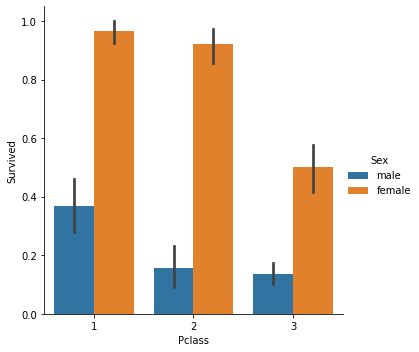

In [24]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',kind='bar',data=Data_train) 

In [25]:
Data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,midlife,1,0,A/5 21171,7.2500,X,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,midlife,1,0,PC 17599,71.2833,C,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,midlife,0,0,STON/O2. 3101282,7.9250,X,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,midlife,1,0,113803,53.1000,C,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,midlife,0,0,373450,8.0500,X,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,midlife,0,0,211536,13.0000,X,S,Others,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,midlife,0,0,112053,30.0000,B,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,midlife,1,2,W./C. 6607,23.4500,X,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,midlife,0,0,111369,30.0000,C,C,Mr,1


In [26]:
Data_train['t1']=pd.qcut(Data_train['Fare'],10)
Data_train['t2']=pd.qcut(Data_train['Fare'],7)
Data_train['t3']=pd.qcut(Data_train['Fare'],5)
Data_train['t4']=pd.qcut(Data_train['Fare'],3)

In [27]:
Data_train['t1']

0        (-0.001, 7.55]
1      (39.688, 77.288]
2         (7.854, 8.05]
3      (39.688, 77.288]
4         (7.854, 8.05]
             ...       
886      (10.5, 14.454]
887     (26.82, 39.688]
888     (21.075, 26.82]
889     (26.82, 39.688]
890       (7.55, 7.854]
Name: t1, Length: 889, dtype: category
Categories (10, interval[float64]): [(-0.001, 7.55] < (7.55, 7.854] < (7.854, 8.05] < (8.05, 10.5] ... (21.075, 26.82] < (26.82, 39.688] < (39.688, 77.288] < (77.288, 512.329]]

In [28]:
Data_train['t2']

0         (-0.001, 7.75]
1      (56.558, 512.329]
2           (7.75, 8.05]
3         (27.9, 56.558]
4           (7.75, 8.05]
             ...        
886     (12.475, 19.258]
887       (27.9, 56.558]
888       (19.258, 27.9]
889       (27.9, 56.558]
890       (-0.001, 7.75]
Name: t2, Length: 889, dtype: category
Categories (7, interval[float64]): [(-0.001, 7.75] < (7.75, 8.05] < (8.05, 12.475] < (12.475, 19.258] < (19.258, 27.9] < (27.9, 56.558] < (56.558, 512.329]]

In [29]:
Data_train['Fare']=pd.cut(Data_train['Fare'], [-0.001,10.5,56.558,1000],labels=['low','medium','high'])

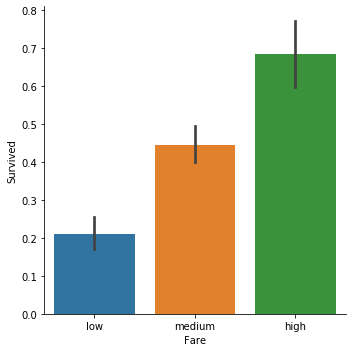

In [30]:
sns.catplot(x='Fare',y='Survived',kind='bar',data=Data_train) 

## 選定Feature: 1.類別資料:['Pclass','Sex','Age','Title','Fare',FamilyNum]`